In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Salary_Dataset_with_Extra_Features.csv")

In [4]:
df.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
10821,4.0,Nuclei,Mobile Engineer,800000,1,Bangalore,Full Time,Mobile
1845,3.5,Stylework,Android Developer,500000,1,New Delhi,Full Time,Android
2434,4.5,Droom,Android Developer - Intern,1500000,1,New Delhi,Intern,Android
4820,4.0,Mindtree,SQL-DBA,300000,1,Bangalore,Full Time,Database
17904,4.1,Expedia Group,Associate Software Development Engineer,1300000,4,New Delhi,Full Time,SDE


In [5]:
df.shape

(22770, 8)

In [6]:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [7]:
df.dtypes

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object

In [8]:
df['Company Name'].value_counts()

Company Name
Tata Consultancy Services                        271
Amazon                                           184
Infosys                                          169
Accenture                                        150
Cognizant Technology Solutions                   144
                                                ... 
SnapBizz Cloudtech                                 1
Randomly                                           1
Advanced Millennium Technologies                   1
Retail Pulse                                       1
ACS (Actividades de construccion y Servicios)      1
Name: count, Length: 11260, dtype: int64

Data cleaning

In [9]:
df['Company Name'] = df['Company Name'].str.replace('Tata Consultancy Services', 'TCS')

companies = ['Amazon', 'Infosys', 'HCL', 'IBM']

for comp in companies:
    df['Company Name'] = df['Company Name'].apply(
        lambda x: comp if isinstance(x, str) and comp in x else x
    )


In [10]:
#now will remove the outliers
df=df[df['Company Name']!="(no)name"]
df=df[~df['Company Name'].isin(['-','....','Fresher'])]

In [11]:
#removing companies names that contain only number
fdi = np.unique([name for name in df['Company Name'] if isinstance(name, str) and name.isnumeric()])


In [12]:
fdi

array(['10', '17544', '1985', '2018', '660000', '700'], dtype='<U6')

In [13]:
df=df[~df['Company Name'].isin(fdi)]

##### d

UNIVARIATE ANALYSIS

In [14]:
de=df['Company Name'].value_counts()
df1 = de.reset_index().head(11)
df1.columns = ['Company Name', 'Count']

df1

,Company Name,Count
0,TCS,313
1,Infosys,208
2,Amazon,203
3,Accenture,150
4,Cognizant Technology Solutions,144
5,IBM,135
6,HCL,132
7,Wipro,122
8,Capgemini,101
9,Microsoft,96


In [15]:
len(df['Company Name'].unique())

11215

In [16]:
len(df['Job Title'].unique())

1076

In [17]:
jb=df['Job Title'].value_counts()
jb1=jb.reset_index().head()
jb1.columns=['Job Title','Count']
jb1

,Job Title,Count
0,Software Development Engineer,2343
1,Android Developer,2027
2,Software Development Engineer (SDE),1604
3,Front End Developer,1404
4,Test Engineer,1308


In [18]:
df['Location'].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [19]:
l=df['Location'].value_counts()
l1=l.reset_index()
l1.columns=['Location','Count']
l1

,Location,Count
0,Bangalore,8227
1,Hyderabad,4431
2,New Delhi,4166
3,Chennai,2437
4,Pune,2127
5,Mumbai,746
6,Kolkata,177
7,Madhya Pradesh,155
8,Kerala,107
9,Jaipur,80


In [20]:
f1 = []
f2 = []

# Iterate over the relevant columns
for i in ['Location', 'Count']:
    if i == 'Location':
        f1.extend(l1[i].values)
    elif i == 'Count':
        f2.extend(l1[i].values)


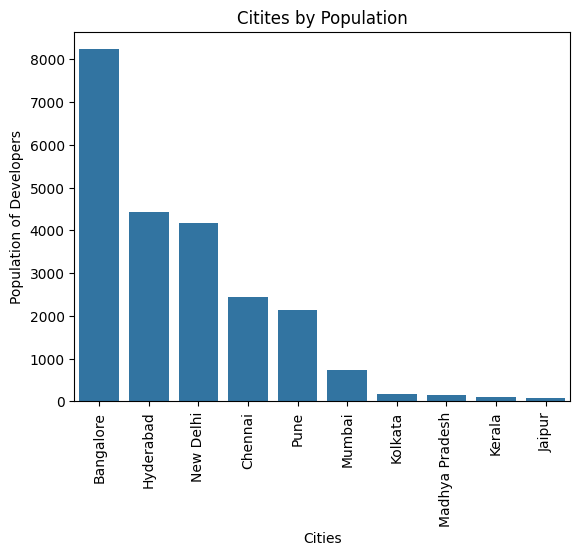

In [21]:
sns.barplot(x=f1,y=f2)
plt.xlabel('Cities')
plt.ylabel('Population of Developers')
plt.title('Citites by Population')
plt.xticks(rotation='vertical')
plt.show()

In [22]:
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [23]:
jr=df['Job Roles'].value_counts()
jr1=jr.reset_index()
jr1.columns=['Job Roles','Count']
jr1

,Job Roles,Count
0,SDE,8151
1,Android,2942
2,Frontend,2149
3,Java,1834
4,Testing,1734
5,IOS,1631
6,Backend,1190
7,Web,993
8,Python,922
9,Database,863


In [24]:
D=[]
D1=[]
for i in ['Job Roles','Count']:
    if i=='Job Roles':
        D.extend(jr1[i].values)
    if i=='Count':
        D1.extend(jr1[i].values)

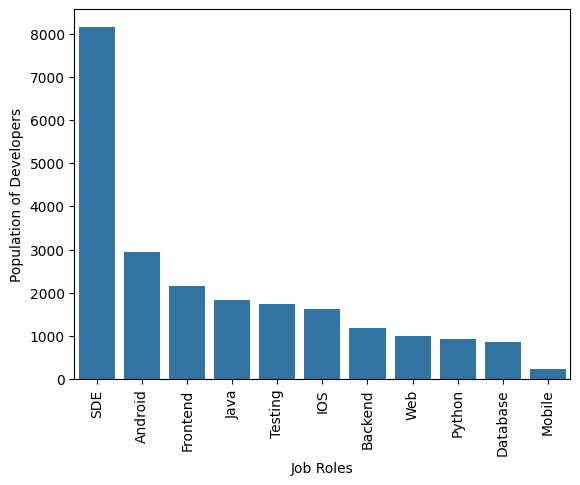

In [25]:
sns.barplot(x=D,y=D1)
plt.xlabel('Job Roles')
plt.ylabel('Population of Developers')
plt.xticks(rotation='vertical')
plt.show()

In [26]:
salary = df['Salary'].describe()
salary_df = salary.reset_index()
salary_df

,index,Salary
0,count,2.265300e+04
1,mean,6.968073e+05
2,std,8.860057e+05
3,min,2.112000e+03
4,25%,3.000000e+05
5,50%,5.000000e+05
6,75%,9.000000e+05
7,max,9.000000e+07


C:\Users\mukun\AppData\Local\Temp\ipykernel_5496\2614900338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'],kde=True)


<Axes: xlabel='Salary', ylabel='Density'>

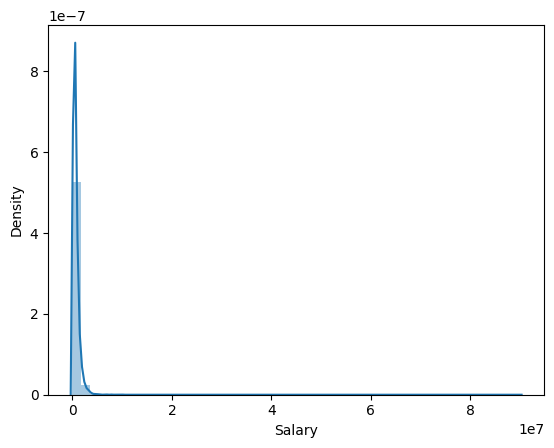

In [27]:
sns.distplot(df['Salary'],kde=True)

As the Mean>Median,this shows that it is a Right-Skewed Disturbution.This is not a very unexpected result beacuse the median salary of a very large pouplation is most likely toward the lower side.

In [28]:
from scipy.stats import skew
print("Skewness is:",skew(df['Salary']))

Skewness is: 46.77595029608785


So the Skewness>>1,this states that it's a right skewed distrubution.
Here we can use many transformation such as log transformation,Power transformation etc.
Here we will use Log transformation

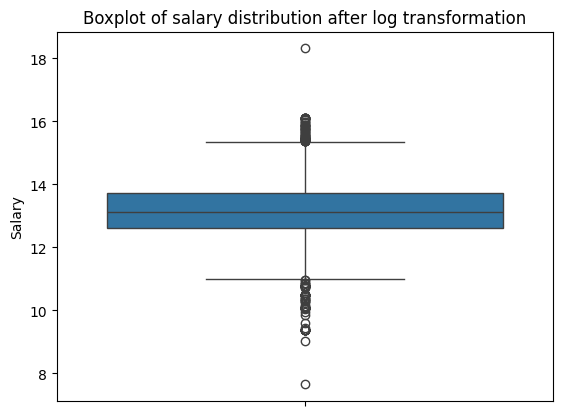

In [29]:
import warnings
warnings.simplefilter(action='ignore')
sns.boxplot(np.log(df['Salary']))
plt.title('Boxplot of salary distribution after log transformation')
plt.show()

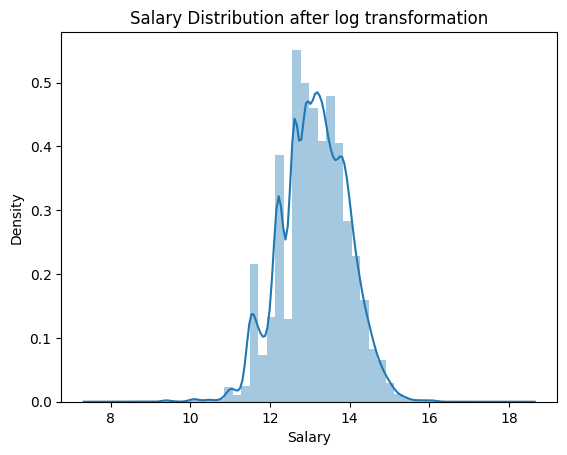

In [30]:
sns.distplot(np.log(df['Salary']),kde=True)
plt.title("Salary Distribution after log transformation")
plt.show()

I guess this distribution is very close to normal and also the skewness is also removed after the log transformation.Thus we can use this plot for Hypothesis testing.

In [31]:

rating_stats = df['Rating'].describe()

# Convert to DataFrame
rating_df = pd.DataFrame(rating_stats)
rating_df

,Rating
count,22653.000000
mean,3.917124
std,0.520700
min,1.000000
25%,3.700000
50%,3.900000
75%,4.200000
max,5.000000


In [32]:
print("Skewness is :", skew(df['Rating']))

Skewness is : -1.0080950998038918


so it is a negative-skewed distribution 

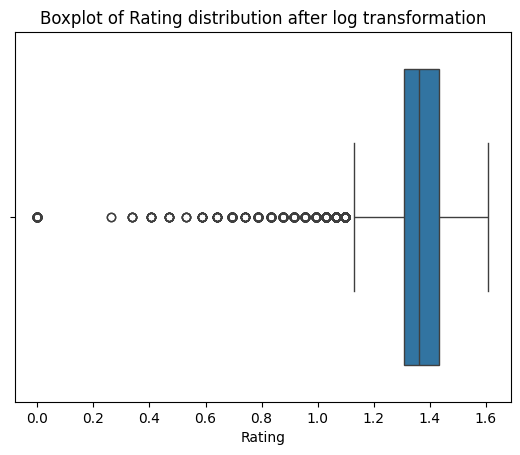

In [33]:
sns.boxplot(np.log(df['Rating']),orient='h')
plt.title('Boxplot of Rating distribution after log transformation')
plt.show()

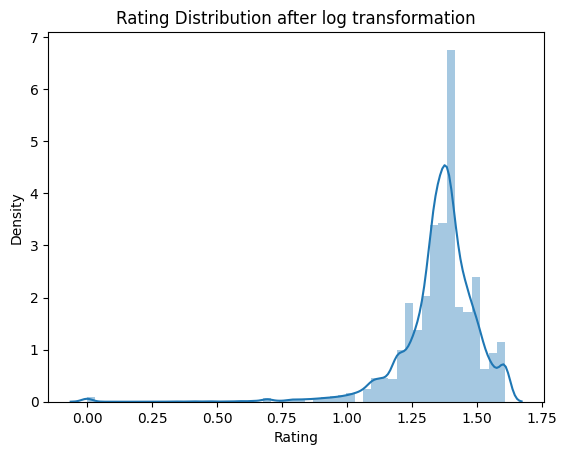

In [34]:
sns.distplot(np.log(df['Rating']),kde=True)
plt.title("Rating Distribution after log transformation")
plt.show()

Thus,the distribution is almost Normal if we ignore the left tail,which have fraction of the data.Thus,it will follow the assumptions of Normal distribution and can be used for 'Hypothesis testing'.

In [35]:
df['Salaries Reported'].unique()

array([  3,   2,   1,   5,   4,   6,   8,  11,   9,  30,  19,  35,  17,
         7,  43,  24,  21,  15,  14,  13,  12,  10,  26,  29,  18,  16,
        84,  38,  36,  20, 291,  23, 353,  40,  60, 162,  68,  33,  45,
        73, 135, 100,  22,  75,  37,  34,  65, 115,  28, 186,  41,  31,
       188, 149,  77,  76,  52,  39,  83,  25, 361,  42, 280,  74,  44,
       331,  70,  50,  48, 263, 116, 106, 103,  98,  91,  80,  71,  64,
        51,  46,  32,  27])

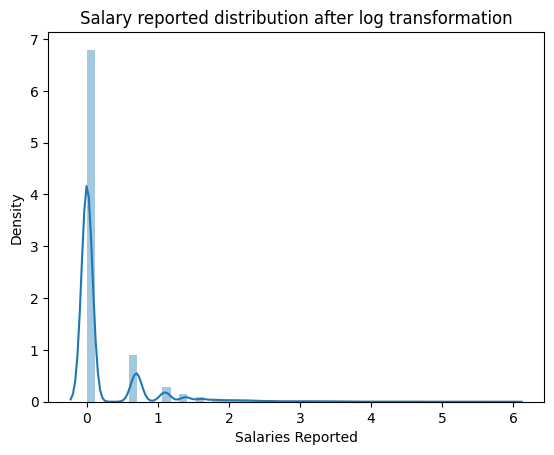

In [36]:
sns.distplot(np.log(df['Salaries Reported']),kde=True)
plt.title('Salary reported distribution after log transformation')
plt.show()

This is nothing close to normal we can't use it for hypothesis testing.

 Employment Status

In [37]:
employment=df['Employment Status'].value_counts()
pd.DataFrame(employment)

,count
Employment Status,
Full Time,19983
Intern,2090
Contractor,548
Trainee,32


In [38]:
f00=[]
f01=[]
for i in employment.index:
    f00.append(i)
    f01.append(employment[i])


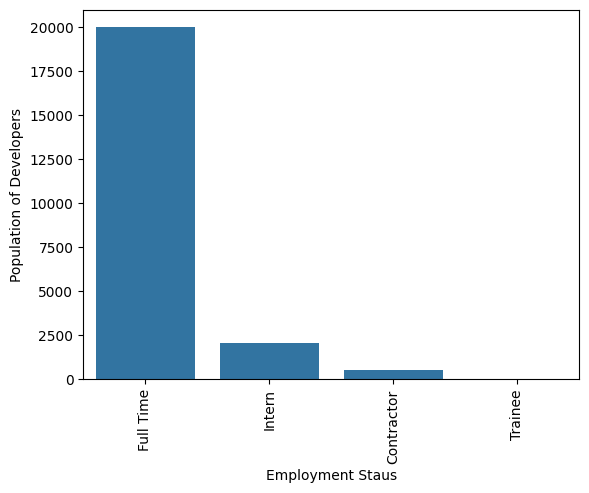

In [39]:
sns.barplot(x=f00,y=f01)
plt.xlabel('Employment Staus')
plt.ylabel('Population of Developers')
plt.xticks(rotation='vertical')
plt.show()

Here we can conclude that most of the employees here are Full time and others are interns.

# HYPOTHESIS

Below are the list of hypothesis that we have built,and lets prove them one-by-one.
## 1st Hypothesis: Most of the SDE's live in Bangalore
## 2nd Hypothesis:Employees using Java in job roles have higher salary than Python.
## 3rd Hypotheis:Microsoft developers living in hyderabad get more salary than Bangalore.
    
As,we saw in the previous section that continuos features of the data is skewed.Thus,we have do a transformations to make them normal.
This is required for hypothesis testing,we assume that our distrubution is Normal.Thus,will do a Log-Transormations to make it normal 
and use this data for further analysis.

Statement:Most of the SDE live in Banglore

In [40]:
sde=df[df['Job Roles']=='SDE']


In [41]:
loc=sde['Location'].value_counts()
ls1=pd.DataFrame(loc)
ls1=ls1.rename(columns={'Location':'Counts'})
ls1

,count
Location,
Bangalore,1981
New Delhi,1691
Hyderabad,1479
Pune,1070
Mumbai,744
Chennai,668
Kolkata,176
Madhya Pradesh,155
Kerala,107


In [42]:
print(ls1.columns)


Index(['count'], dtype='object')


In [43]:
D_e=[]
D_F=[]
for key, value in ls1.iterrows():
    D_e.append(key)
    D_F.append(value['count'])


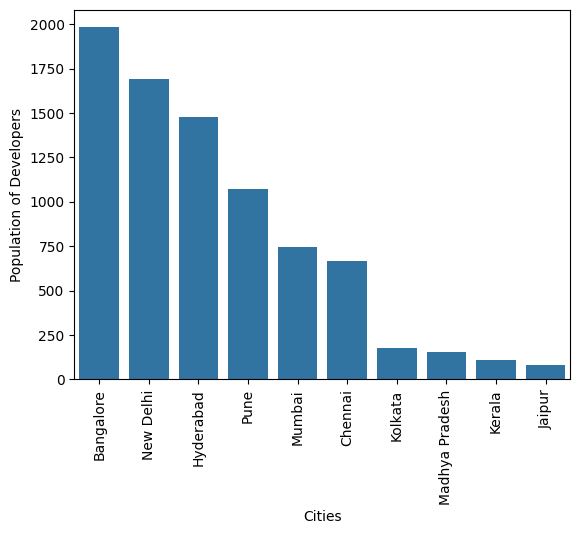

In [44]:
sns.barplot(x=D_e,y=D_F)
plt.xticks(rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Population of Developers')
plt.show()

### It appears that software development engineers (SDEs) have a strong preference for Bangalore, which may be likened to how Kota is favored by students preparing for competitive exams. Given that the counts of developers do not form a standard statistical distribution, we are unable to perform hypothesis testing. Therefore, we rely on the insights derived from the bar plot.

The data under consideration consists of categorical counts — the number of Software Development Engineers (SDEs) in each city. Since this is categorical frequency data and not continuous, normality testing is not applicable. Instead, we can use the Chi-Square Goodness-of-Fit test to check whether the distribution of SDEs across cities is uniform or uneven.

Null Hypothesis (H₀): SDEs are evenly distributed across all cities.

Alternative Hypothesis (H₁): SDE distribution is not even — at least one city has a significantly different count.

In [45]:
import numpy as np
from scipy import stats

# Perform Chi-Square Goodness-of-Fit test to check if the distribution of developers across locations is equal
# Extract observed counts
observed = ls1['count'].values

# Expected counts = equal distribution among all locations
expected = np.full_like(observed, observed.mean(), dtype=float)

# Perform Chi-Square Goodness-of-Fit test
chi2_stat, chi2_p = stats.chisquare(f_obs=observed, f_exp=expected)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {chi2_p:.4f}")

if chi2_p < 0.05:
    print("✅ Reject H0: Distribution is significantly different from equal distribution.")
else:
    print("❌ Fail to Reject H0: No significant difference from equal distribution.")


Chi-Square Statistic: 5575.90
P-value: 0.0000
✅ Reject H0: Distribution is significantly different from equal distribution.


### The results confirm that certain cities have a disproportionately high or low number of SDEs compared to an equal distribution. In particular, Bangalore has the largest share of SDEs, strongly supporting our hypothesis that most of the SDEs live in Bangalore.

# 2nd Hypothesis

## Statement:The java developers have higher salary as compared to python 

In [46]:
DF=df.copy()
DF['Salary']=np.log(DF['Salary'])

D12=DF[DF['Job Roles'].isin(['Java','Python'])]



In [47]:
r1=D12[D12['Job Roles']=="Java"].Salary
pd.DataFrame(r1)

,Salary
8790,12.206073
8791,12.899220
8792,13.835313
8793,11.790557
8794,11.338572
...,...
10645,14.285514
10646,14.403297
10647,12.976181
11861,12.899220


In [48]:
r1.describe()

count    1834.000000
mean       12.942229
std         0.754228
min         9.041685
25%        12.448814
50%        12.899220
75%        13.458836
max        16.118096
Name: Salary, dtype: float64

In [49]:
r2=D12[D12['Job Roles']=="Python"].Salary
pd.DataFrame(r2)

,Salary
10896,12.206073
10897,12.206073
10898,12.611538
10899,12.206073
10901,12.611538
...,...
11857,12.899220
11858,13.592367
11859,12.283034
11860,13.458836


In [50]:
r2.describe()

count    922.000000
mean      12.851564
std        0.712488
min       10.085809
25%       12.388394
50%       12.899220
75%       13.304685
max       15.747032
Name: Salary, dtype: float64

Two-Sampled Z-test

Null Hypothesis (Ho): Java developers have similar salaries compared to Python developers.

Alternative Hypothesis (Ha): Java developers have different salaries compared to Python developers.
alpha=0.05

Aim:Here we have 2 Samples,so to compare their mean,we will do a '2 sample Z-test'.As the sample is large,so 'Z-test' will be good
test static.IF we get P value lower than alpha,then the effect is real and the result is statistically significant.    

In [51]:
numbers=np.array([1834,922])
salarysum=np.array([12.94,12.85])
from statsmodels.stats.weightstats import ztest

In [52]:
z_stat, p_val = ztest(r1, r2, alternative='two-sided')

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

Z-statistic: 3.0326628053525946
P-value: 0.002424062987353867


### Since p-value (0.00242) < α (0.05), we reject the null hypothesis. This means there is a statistically significant difference in average salaries between Java and Python developers.
### Given the positive Z-statistic, Java developers earn more on average than Python developers in our dataset.




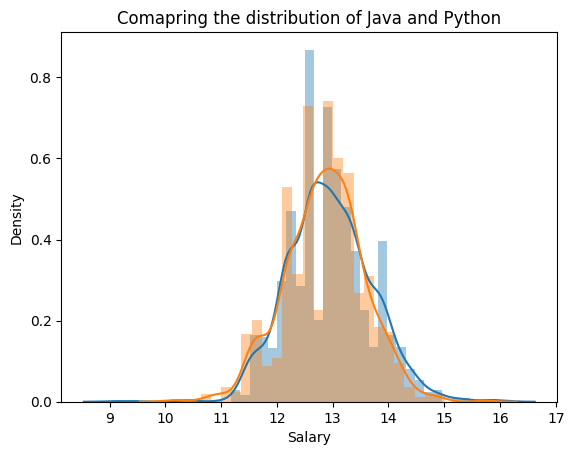

In [53]:
sns.distplot(D12[D12['Job Roles']=='Java'].Salary,label='Java')
sns.distplot(D12[D12['Job Roles']=='Python'].Salary,label='Python')
plt.title("Comapring the distribution of Java and Python")
plt.show()

## Result:
### Based on the two-sample z-test, we reject the null hypothesis, indicating that Java and Python developers have similar salaries (thank goodness). The higher number of individuals in Java development supports this finding.

# 3rd Hypothesis

## Statement:Microsoft developers living in hyderabad get more salary than Bangalore

Two-Sample Z-Test

Null Hypothesis (Ho): Employees working in Hyderabad are paid equally to those in Bangalore.

Alternative Hypothesis (Ha): Microsoft employees working in Hyderabad are paid differently than those in Bangalore.

Alpha: 0.05

Aim: Here, we will perform a two-sample z-test to verify our hypothesis. Typically, we use the z-test when
n>30 and the population standard deviation is known.

In [54]:
D13=DF[DF['Location'].isin(['Bangalore','Hyderabad'])]
D33=D13[D13['Company Name']=="Microsoft"]
x11=D33[D33['Location']=='Bangalore'].Salary
x12=D33[D33['Location']=='Hyderabad'].Salary

In [55]:
hyd=x12.describe()
hyd_stats=pd.DataFrame(hyd)
hyd_stats.rename(columns={'Salary': 'Hyderabad(Salary)'})

,Hyderabad(Salary)
count,47.000000
mean,13.930937
std,1.078638
min,9.392662
25%,13.570704
50%,14.151983
75%,14.603968
max,15.201805


In [56]:
bng=x11.describe()
bng_stats=pd.DataFrame(bng)
bng_stats.rename(columns={'Salary': 'Bangalore(Salary)'})

,Bangalore(Salary)
count,20.000000
mean,13.911496
std,0.778606
min,11.512925
25%,13.777073
50%,13.994348
75%,14.353498
max,15.009433


In [57]:
from scipy.stats import ttest_ind

# Two-sample independent t-test
t_stat, p_val = ttest_ind(x12, x11, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant difference in salaries.")
else:
    print("Fail to reject H0 → No significant difference in salaries.")


T-statistic: 0.0828
P-value: 0.9343
Fail to reject H0 → No significant difference in salaries.


### So,Pvalue>alpha(0.05) ,it suggests that salaries is  similar that means we will reject the null hypothesis

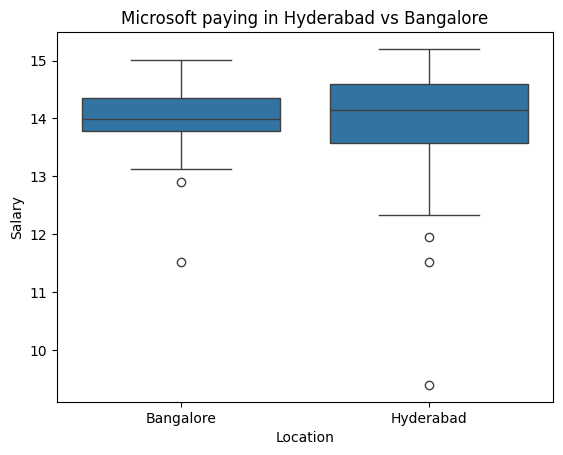

In [58]:
sns.boxplot(x='Location',y='Salary',data=D33)
plt.title('Microsoft paying in Hyderabad vs Bangalore')
plt.show()

Based on the boxplot analysis, we conclude that the median salary in Hyderabad is higher than that in Bangalore. 

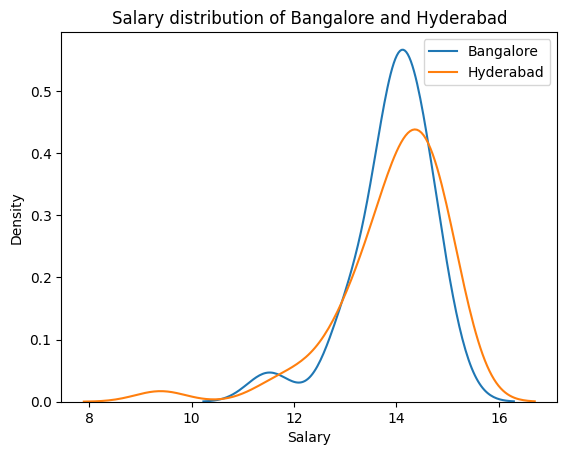

In [59]:
sns.distplot(x11,label='Bangalore',hist=False)
sns.distplot(x12,label='Hyderabad',hist=False)
plt.title('Salary distribution of Bangalore and Hyderabad')
plt.legend()
plt.show()

### Result: We reject the null hypothesis that Microsoft employees living in Hyderabad are paid more than those in Bangalore. Additionally, when n>30, the z-test is typically preferred.

# Pearson's  Correlation Coefficient Matrix

Here,in this dataframe we have only three features that are continuous namely:Salary,Rating and Salary reported.
Lets find out the correlation coefficient matrices of three such combinations.

In [60]:
df[['Rating',"Salary",'Salaries Reported']].corr().style.background_gradient()

,Rating,Salary,Salaries Reported
Rating,1.000000,0.026201,-0.011708
Salary,0.026201,1.000000,0.004632
Salaries Reported,-0.011708,0.004632,1.000000


1)Salary vs Rating

In [61]:
np.corrcoef(np.log(df['Salary']),(np.log(df['Rating'])))

array([[1.        , 0.04779641],
       [0.04779641, 1.        ]])

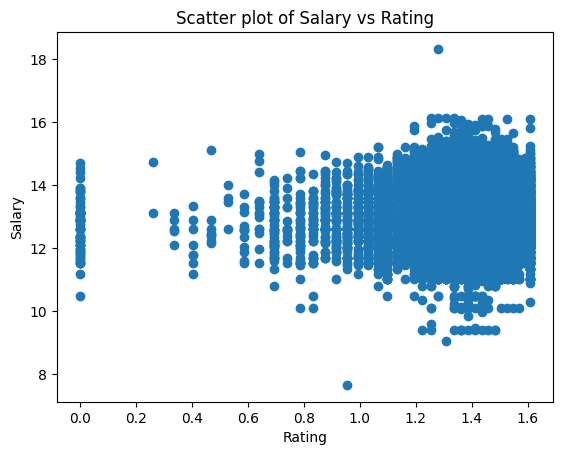

In [62]:
plt.scatter(np.log(df['Rating']),(np.log(df['Salary'])))

plt.xlabel('Rating')
plt.ylabel('Salary')
plt.title('Scatter plot of Salary vs Rating')
plt.show()

## Conclusion:
### As,correlation coefficient is very low,thus it does not show any linear relationship.For,some region its linear up and others its linear down.In some regions it shows how the salary increases by keeping the rating constant and vice versa.Thus,in total there is no significant correlation

In [63]:
#2)Salary vs Salaries Reported
np.corrcoef(np.log(df['Salary']),np.log(df['Salaries Reported']))

array([[ 1.        , -0.01852447],
       [-0.01852447,  1.        ]])

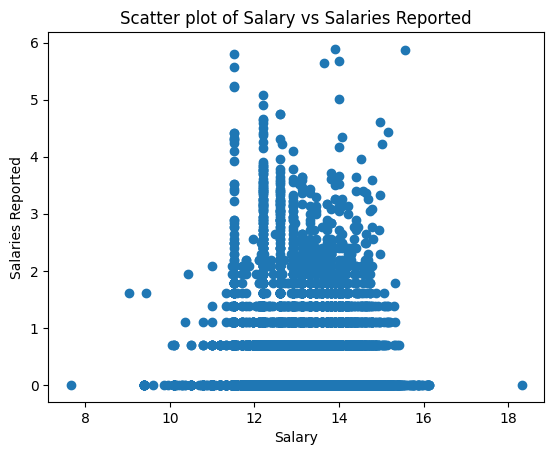

In [64]:
plt.scatter(np.log(df['Salary']),(np.log(df['Salaries Reported'])))

plt.xlabel('Salary')
plt.ylabel('Salaries Reported')
plt.title('Scatter plot of Salary vs Salaries Reported')
plt.show()

# Conclusion 
## Here the Correlation Coefficient is negative but very small,so there is no linear behaviour between them.We can see at constant Salaries reported salaries increases and vice versa.This also supports the idea that they dont have much correlation.

In [65]:
#3)Rating vs Salaries Reported
np.corrcoef(np.log(df['Rating']),np.log(df['Salaries Reported']))

array([[1.        , 0.02091221],
       [0.02091221, 1.        ]])

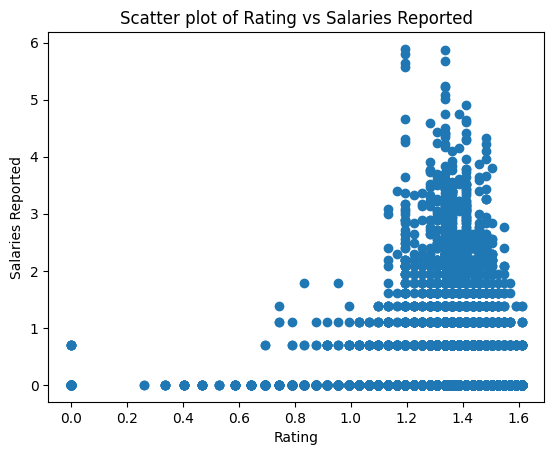

In [66]:
plt.scatter(np.log(df['Rating']),(np.log(df['Salaries Reported'])))

plt.xlabel('Rating')
plt.ylabel('Salaries Reported')
plt.title('Scatter plot of Rating vs Salaries Reported')
plt.show()

# Conclusion 
## Here,the correlation is positive but very small,thus no linear trend is expected.This also reflected in the scatter plot,as when 'Rating' increases,'Salaries Reported' remains same and vice versa.

# Location

In [67]:
loc1=df[df['Location'].isin(['Bangalore'])].Salary.describe()
pd.DataFrame(loc1)

,Salary
count,8.227000e+03
mean,7.365826e+05
std,6.846221e+05
min,2.112000e+03
25%,3.000000e+05
50%,5.000000e+05
75%,1.000000e+06
max,1.000000e+07


In [68]:
loc2=df[df['Location'].isin(['Mumbai'])].Salary.describe()
pd.DataFrame(loc2)

,Salary
count,7.460000e+02
mean,9.616945e+05
std,8.456556e+05
min,1.200000e+04
25%,4.000000e+05
50%,7.040000e+05
75%,1.200000e+06
max,9.800000e+06


In [69]:
loc3=df[df['Location'].isin(['Chennai'])].Salary.describe()
pd.DataFrame(loc3)

,Salary
count,2.437000e+03
mean,5.871857e+05
std,5.450216e+05
min,1.200000e+04
25%,2.520000e+05
50%,4.000000e+05
75%,7.000000e+05
max,1.000000e+07


In [70]:
loc4=df[df['Location'].isin(['Jaipur'])].Salary.describe()
pd.DataFrame(loc4)

,Salary
count,8.000000e+01
mean,6.347500e+05
std,4.758409e+05
min,3.600000e+04
25%,3.000000e+05
50%,5.000000e+05
75%,8.250000e+05
max,2.500000e+06


# Region wise insights:

## 1.Most of the developers live in bangalore and with median salary 5 LPA.
## 2.Mumbai is the city with the largest median salary of 7 LPA.
## 3.Jaipur is the place where the least developers live with the medain of 5 LPA.
## 4.Chennai is the place with lowest median salary of 4 LPA.

# Job Roles

In [71]:
job1=df[df['Job Roles'].isin(['SDE'])].Salary.describe()
pd.DataFrame(job1)

,Salary
count,8.151000e+03
mean,8.551023e+05
std,1.234722e+06
min,1.200000e+04
25%,3.870000e+05
50%,6.720000e+05
75%,1.100000e+06
max,9.000000e+07


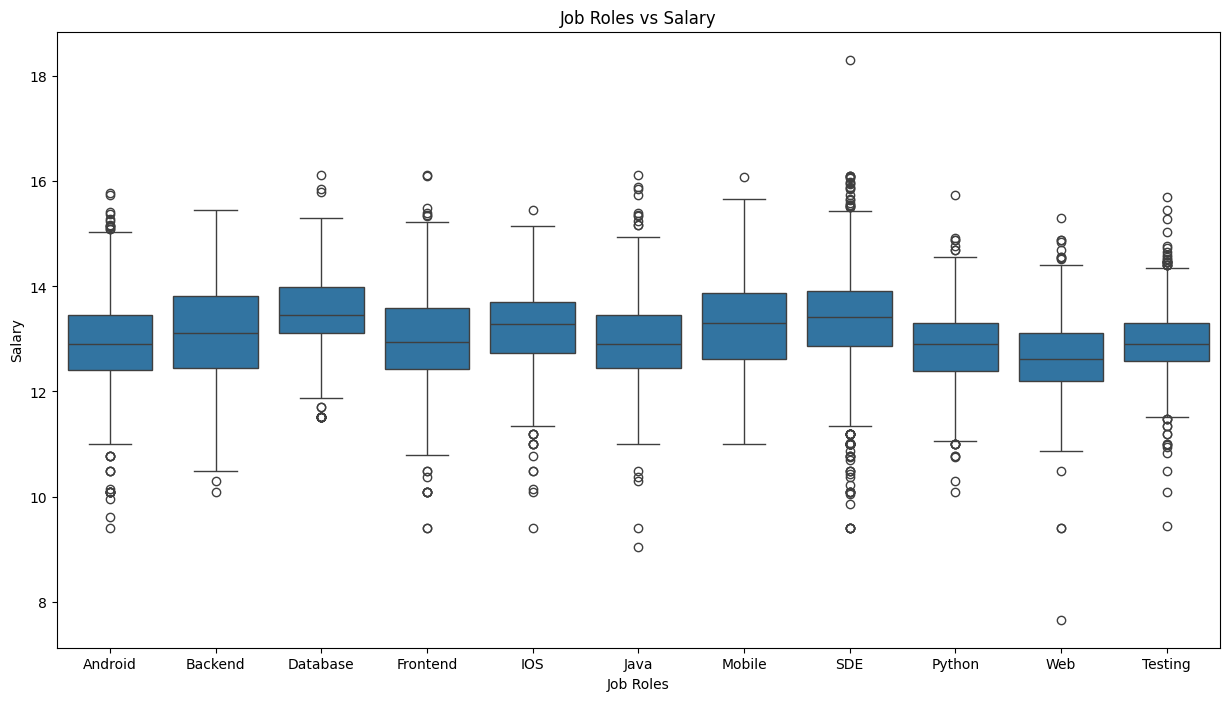

In [72]:
plt.rcParams['figure.figsize'] = [15, 8]  
sns.boxplot(x='Job Roles', y='Salary', data=DF)
plt.title('Job Roles vs Salary')
plt.show()

In [73]:
job2=df[df['Job Roles'].isin(['Database'])].Salary.describe()
pd.DataFrame(job2)

,Salary
count,8.630000e+02
mean,9.596468e+05
std,8.158439e+05
min,1.000000e+05
25%,5.000000e+05
50%,7.000000e+05
75%,1.200000e+06
max,1.000000e+07


In [74]:
job3=df[df['Job Roles'].isin(['Backend'])].Salary.describe()
pd.DataFrame(job3)

,Salary
count,1.190000e+03
mean,7.494241e+05
std,7.286335e+05
min,2.400000e+04
25%,2.550000e+05
50%,5.000000e+05
75%,1.000000e+06
max,5.200000e+06


In [75]:
job4=df[df['Job Roles'].isin(['Web'])].Salary.describe()
pd.DataFrame(job4)

,Salary
count,9.930000e+02
mean,4.164758e+05
std,3.598394e+05
min,2.112000e+03
25%,2.000000e+05
50%,3.000000e+05
75%,5.000000e+05
max,4.400000e+06


In [76]:
job5=df[df['Job Roles'].isin(['Python'])].Salary.describe()
pd.DataFrame(job5)

,Salary
count,9.220000e+02
mean,4.909930e+05
std,4.274532e+05
min,2.400000e+04
25%,2.400000e+05
50%,4.000000e+05
75%,6.000000e+05
max,6.900000e+06


# Job Roles insigths:
## 1.Developers working on database have the highest median salary of 7 LPA,with the least variance.
## 2.Most of the developers work as SDEs with the median salary of 6.7 LPA,which is also the second highest salary.
## 3.Backend developers have quite spread Salary distrubution,this also the situation of Mobile developers.
## 4.Web developers have the lowest median salary of 3 LPA.

# Company 

In [77]:
com1=df[df['Company Name'].isin(['Microsoft'])].Salary.describe()
pd.DataFrame(com1)

,Salary
count,9.600000e+01
mean,1.444882e+06
std,9.745901e+05
min,1.200000e+04
25%,6.810000e+05
50%,1.200000e+06
75%,2.025000e+06
max,4.300000e+06


In [78]:
com2=df[df['Company Name'].isin(['TCS'])].Salary.describe()
pd.DataFrame(com2)

,Salary
count,3.130000e+02
mean,5.023035e+05
std,5.457402e+05
min,2.400000e+04
25%,2.880000e+05
50%,4.000000e+05
75%,6.000000e+05
max,8.000000e+06


In [79]:
com3=df[df['Company Name'].isin(['Google'])].Salary.describe()
pd.DataFrame(com3)

,Salary
count,8.000000e+01
mean,9.325002e+05
std,9.465140e+05
min,6.124800e+04
25%,2.405760e+05
50%,5.760000e+05
75%,1.200000e+06
max,5.100000e+06


In [80]:
com4=df[df['Company Name'].isin(['Amazon'])].Salary.describe()
pd.DataFrame(com4)

,Salary
count,2.030000e+02
mean,1.189699e+06
std,1.187718e+06
min,3.379200e+04
25%,4.000000e+05
50%,9.600000e+05
75%,1.500000e+06
max,9.850000e+06


In [81]:
com4=df[df['Company Name'].isin(['Capgemini'])].Salary.describe()
pd.DataFrame(com4)

,Salary
count,1.010000e+02
mean,5.279010e+05
std,4.074538e+05
min,1.000000e+05
25%,3.000000e+05
50%,4.000000e+05
75%,6.000000e+05
max,2.200000e+06


In [82]:
de.head(11).index

Index(['TCS', 'Infosys', 'Amazon', 'Accenture',
       'Cognizant Technology Solutions', 'IBM', 'HCL', 'Wipro', 'Capgemini',
       'Microsoft', 'Google'],
      dtype='object', name='Company Name')

In [83]:
DFi=DF[DF['Company Name'].isin(de.head(11).index)]

Text(0.5, 1.0, 'Companies vs Salary')

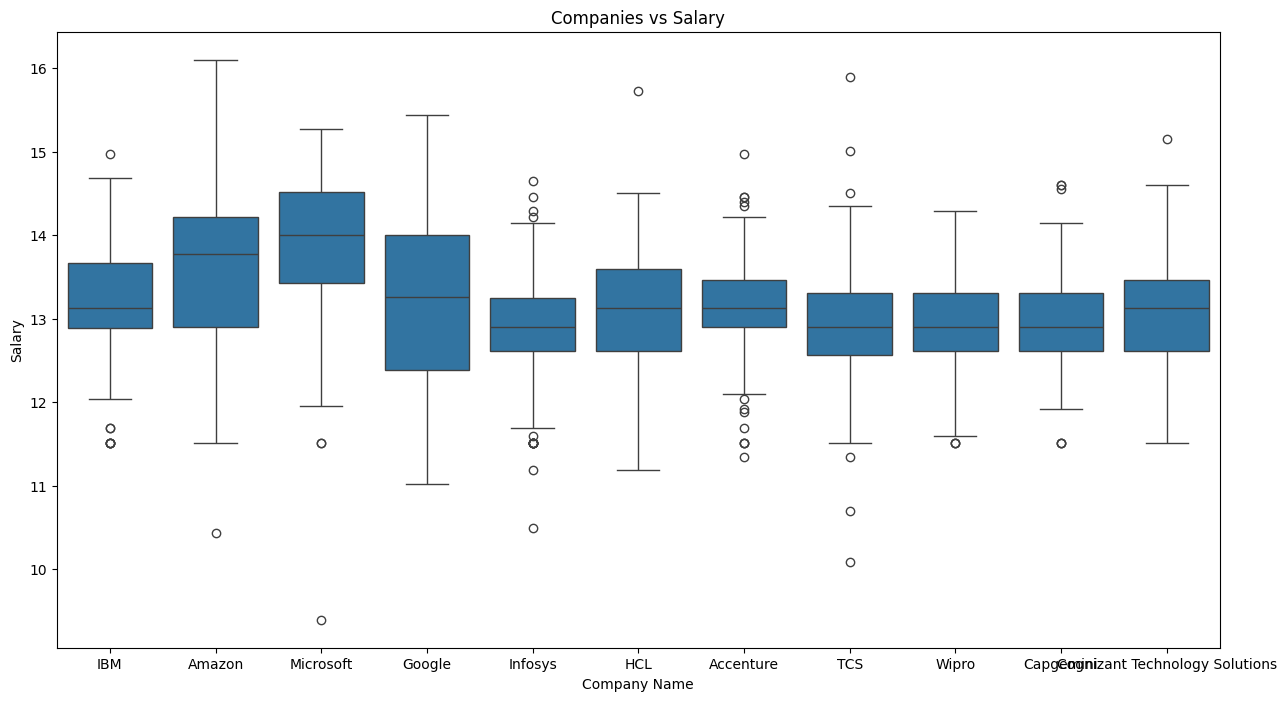

In [84]:
sns.boxplot(x='Company Name',y='Salary',data=DFi)
plt.title('Companies vs Salary')

Text(0.5, 1.0, 'Companies vs Rating')

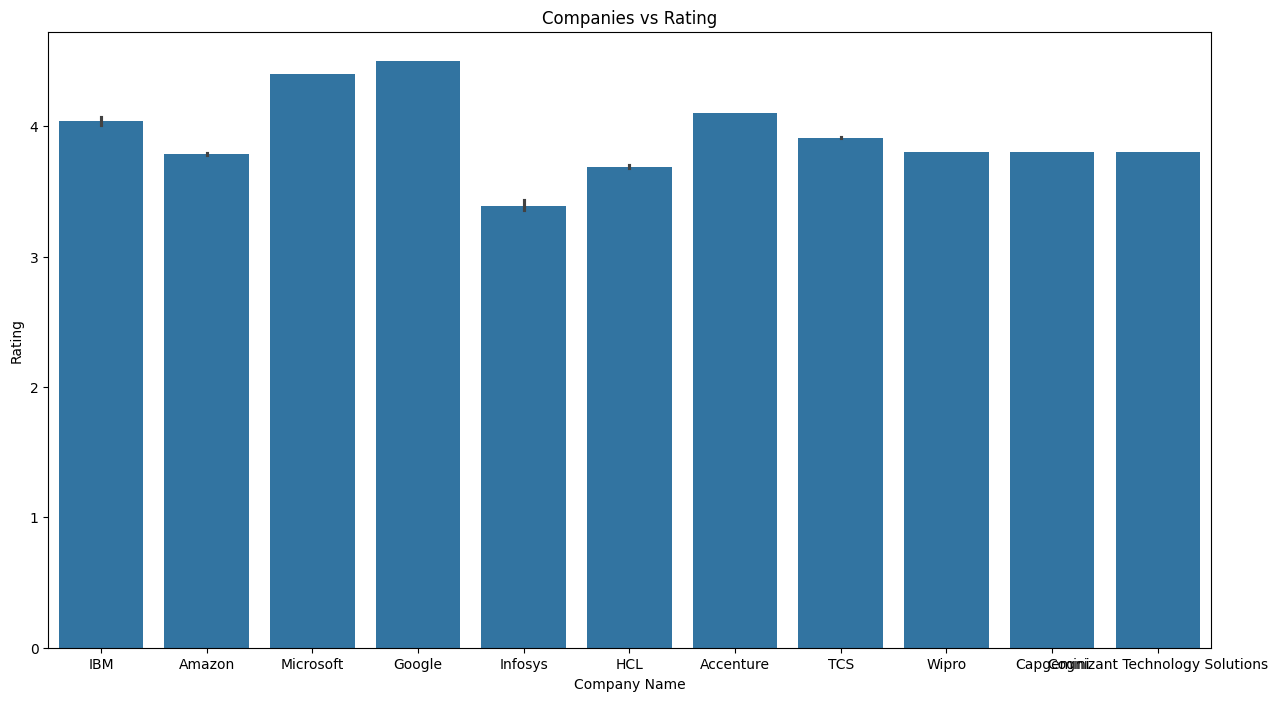

In [85]:
sns.barplot(x='Company Name',y='Rating',data=DFi)
plt.title('Companies vs Rating')


# Company-Wise Insights:
## 1.TCS has the highest number of employees, with a median salary of 4 LPA.
## 2.Developers at Microsoft receive the highest median salary of 12 LPA, followed by those at Amazon and Google, with median salaries of 9.6 LPA and 5.8 LPA, respectively.
## 3.Developers at TCS, Infosys, Wipro, and Capgemini have the lowest median salary of 4 LPA.
## 4.Employees of Microsoft and Google have higher ratings compared to other companies, while Infosys employees have the lowest rating.